In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset, skipping first 4 rows
df = pd.read_csv("C:/Projects/Nifty data.csv", skiprows=4)

# Set first row as header
df.columns = df.iloc[0]
df = df[1:]

# Clean column names
df.columns = [col.strip().replace('\n', ' ').replace(' ', '_') for col in df.columns]

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'High-Low', 'Movement']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop mostly empty 'Monthly_Average' if present
if 'Monthly_Average' in df.columns:
    df = df.drop(columns=['Monthly_Average'])

# Optional: drop rows with missing values
df.dropna(inplace=True)



# Check result
print(df.info())
print(df.head())

df.to_csv("C:/Users/admin/Documents/Cleaned_Nifty_Data.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2 to 1078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      58 non-null     datetime64[ns]
 1   Open      58 non-null     float64       
 2   High      58 non-null     float64       
 3   Low       58 non-null     float64       
 4   Close     58 non-null     float64       
 5   High-Low  58 non-null     float64       
 6   Movement  58 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.6 KB
None
                 Date   Open   High    Low  Close  High-Low  Movement
2 1999-04-01 15:30:00  896.0  905.0  896.0  898.0       9.0       7.0
3 1999-05-01 15:30:00  901.0  907.0  893.0  907.0      14.0       9.0
4 1999-06-01 15:30:00  923.0  931.0  916.0  928.0      15.0      21.0
5 1999-07-01 15:30:00  933.0  961.0  933.0  955.0      28.0      27.0
6 1999-08-01 15:30:00  970.0  990.0  966.0  990.0      24.0      35.0


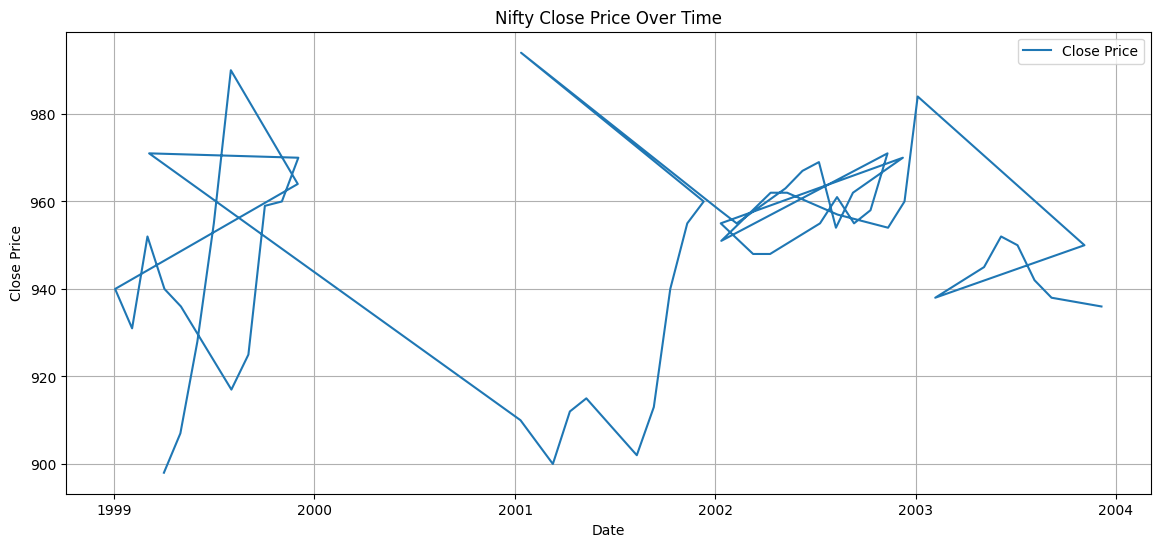

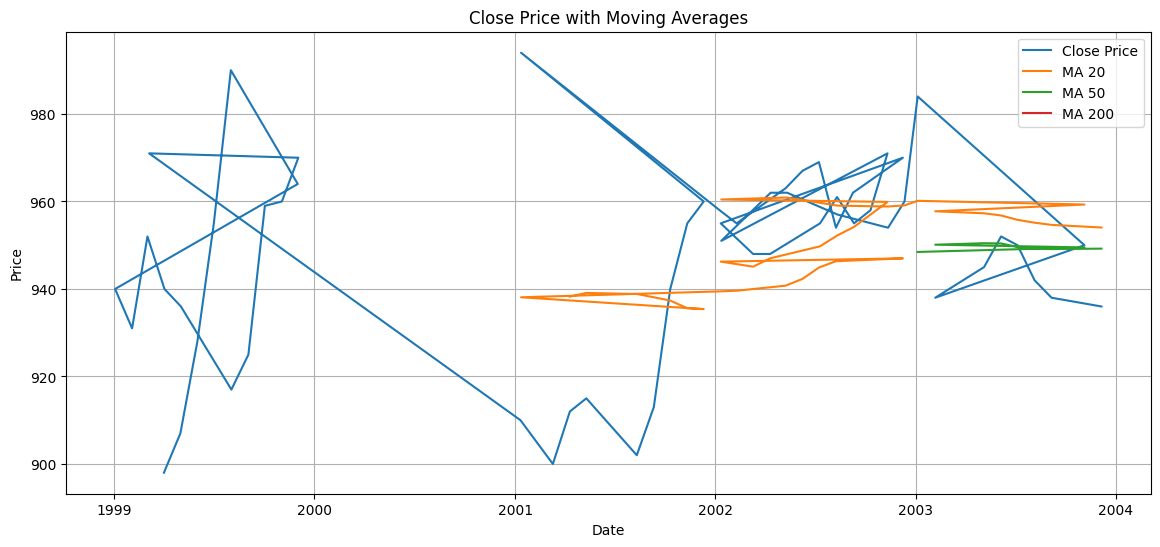

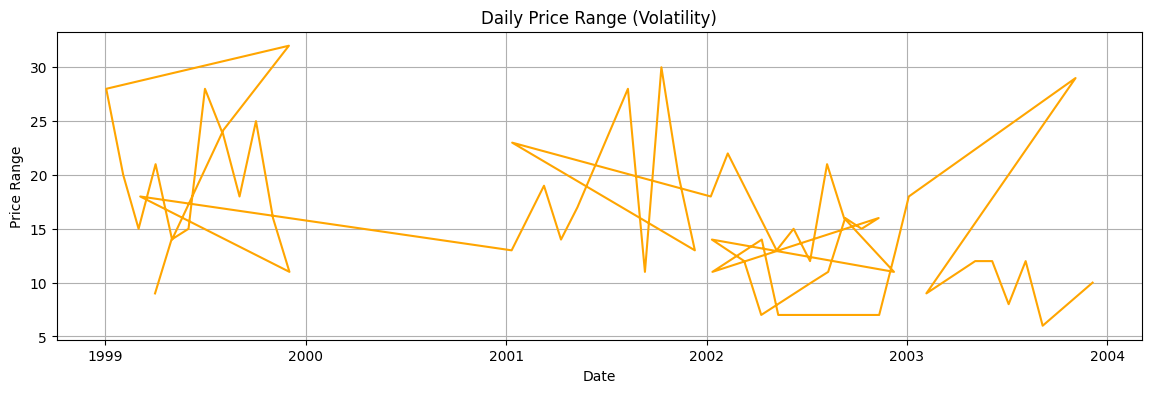

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Nifty Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

# 📉 Add Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# 🧩 Plot with Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='MA 20')
plt.plot(df['Date'], df['MA50'], label='MA 50')
plt.plot(df['Date'], df['MA200'], label='MA 200')
plt.title("Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# 🌩️ Volatility Visualization (High - Low)
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['High'] - df['Low'], label='Daily Volatility', color='orange')
plt.title("Daily Price Range (Volatility)")
plt.xlabel("Date")
plt.ylabel("Price Range")

plt.grid()